In [41]:
import pandas as pd
import numpy as np
from statsmodels.tsa.stattools import adfuller
import statsmodels.api as sm
import statsmodels.tsa.api as smt
from statsmodels.tsa.stattools import adfuller
import matplotlib.pyplot as plt
from scipy.stats import boxcox
%matplotlib inline

In [42]:
def test_stationarity(timeseries):
    print('Results of Dickey-Fuller Test:')
    dftest = adfuller(timeseries, autolag='AIC')
    dfoutput = pd.Series(dftest[0:4], index=['Test Statistic', 'p-value', '#Lags Used', 'Number of Observations Used'])
    for [key, value] in dftest[4].items():
        dfoutput['Critical Value (%s)' % key] = value
    print(dfoutput)

In [43]:
def tsplot(y, lags=None, figsize=(14, 8), style='bmh'):
    test_stationarity(y)
    if not isinstance(y, pd.Series):
        y = pd.Series(y)
    with plt.style.context(style):
        plt.figure(figsize=figsize)
        layout = (4, 1)
        ts_ax = plt.subplot2grid(layout, (0, 0), rowspan=2)
        acf_ax = plt.subplot2grid(layout, (2, 0))
        pacf_ax = plt.subplot2grid(layout, (3, 0))

        y.plot(ax=ts_ax, color='blue', label='Or')
        ts_ax.set_title('Original')

        smt.graphics.plot_acf(y, lags=lags, ax=acf_ax, alpha=0.05)
        smt.graphics.plot_pacf(y, lags=lags, ax=pacf_ax, alpha=0.05)

        plt.tight_layout()
    return

## Первый ряд - продажи алкоголя pf 1870-1938 года в UK

In [65]:
series = pd.read_csv("alcohol-demand-log-spirits-consu.csv", error_bad_lines=False)

b'Skipping line 210: expected 2 fields, saw 3\n'


In [66]:
series.head()

,Month,"Alcohol demand (log spirits consumption per head), UK, 1870-1938"
0,1870-04,1.957
1,1870-08,1.979
2,1870-12,2.012
3,1871-04,2.045
4,1871-08,2.056


In [67]:
series=series['Alcohol demand (log spirits consumption per head), UK, 1870-1938']

Results of Dickey-Fuller Test:
Test Statistic                  -0.965520
p-value                          0.765631
#Lags Used                       1.000000
Number of Observations Used    205.000000
Critical Value (1%)             -3.462658
Critical Value (5%)             -2.875744
Critical Value (10%)            -2.574341
dtype: float64


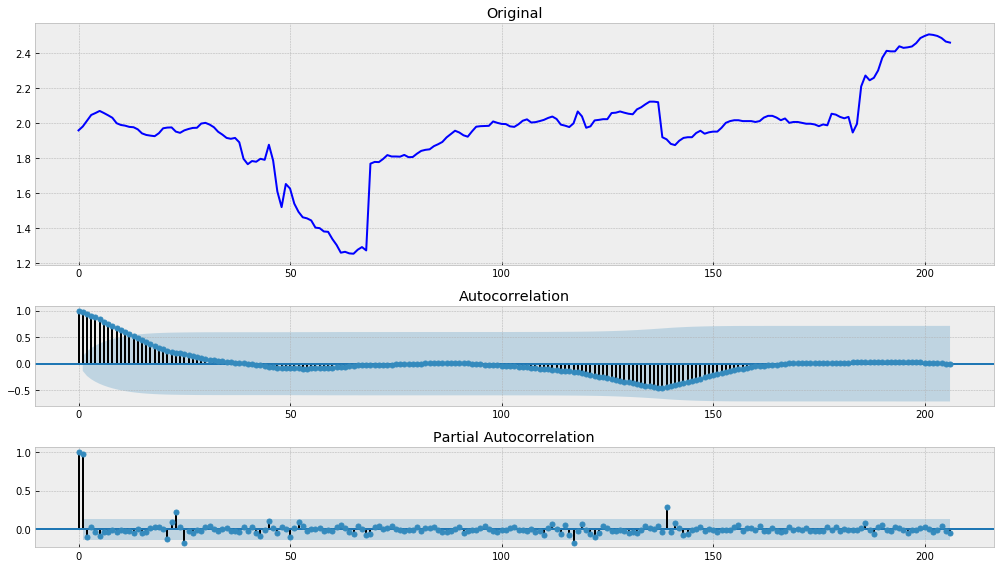

In [15]:
tsplot(series)

Как мы видим, и тест Дики-Фуллера и графики коррелограмм не отвергают гипотезу о нестационарности ряда. Для начала уберем изменение дисперсии при помощи преобразования Бокса-Кокса

In [16]:
series = boxcox(series, 0)

Results of Dickey-Fuller Test:
Test Statistic                  -1.071274
p-value                          0.726391
#Lags Used                       0.000000
Number of Observations Used    206.000000
Critical Value (1%)             -3.462499
Critical Value (5%)             -2.875675
Critical Value (10%)            -2.574304
dtype: float64


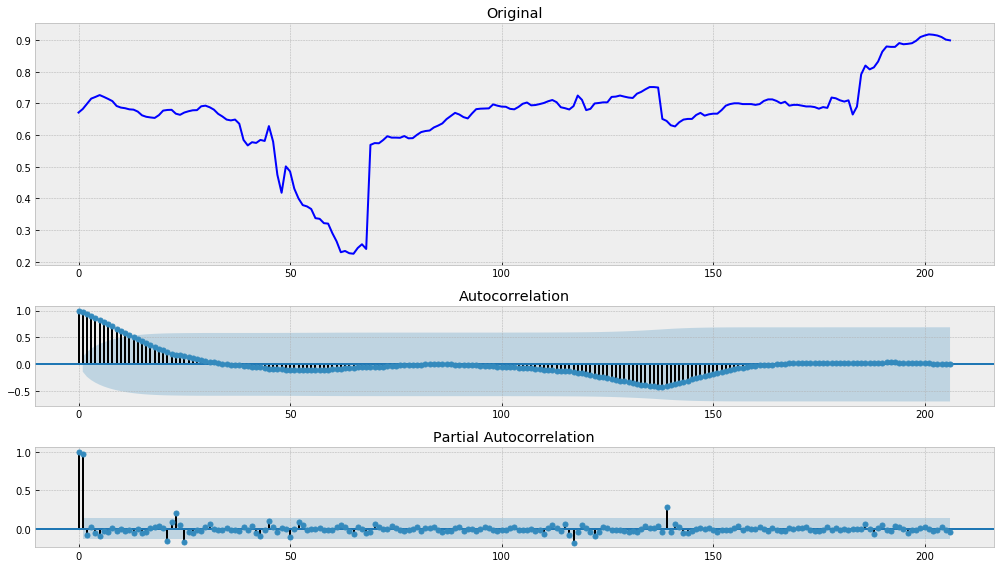

In [17]:
tsplot(series)

Нам удалось убрать размах дисперсии, но тест Дикки-Фуллера все еще не отвергает гипотезу о нестационарности ряда. По графику ряда видно наличие сильного тренда. Уберем его дифференцированием.

In [18]:
series = series[1:] - series[:-1]

Results of Dickey-Fuller Test:
Test Statistic                -1.313686e+01
p-value                        1.456179e-24
#Lags Used                     0.000000e+00
Number of Observations Used    2.050000e+02
Critical Value (1%)           -3.462658e+00
Critical Value (5%)           -2.875744e+00
Critical Value (10%)          -2.574341e+00
dtype: float64


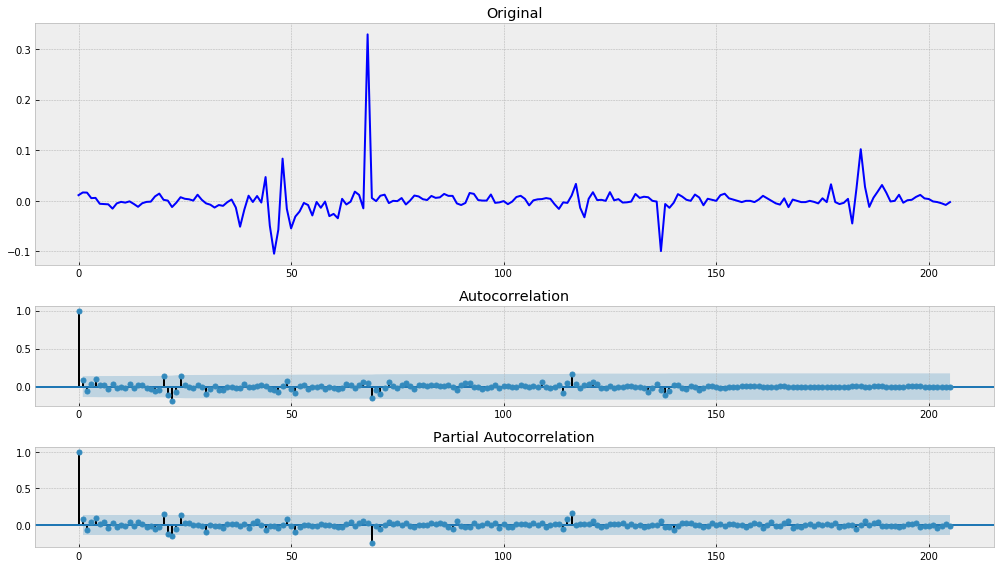

In [19]:
tsplot(series)

Стало еще лучше, но по графику коррелограммы видно сильное влияние сезонности. Уберем ее

In [20]:
series = series[12:] - series[:-12]

Results of Dickey-Fuller Test:
Test Statistic                -6.450947e+00
p-value                        1.524048e-08
#Lags Used                     1.100000e+01
Number of Observations Used    1.820000e+02
Critical Value (1%)           -3.466800e+00
Critical Value (5%)           -2.877555e+00
Critical Value (10%)          -2.575308e+00
dtype: float64


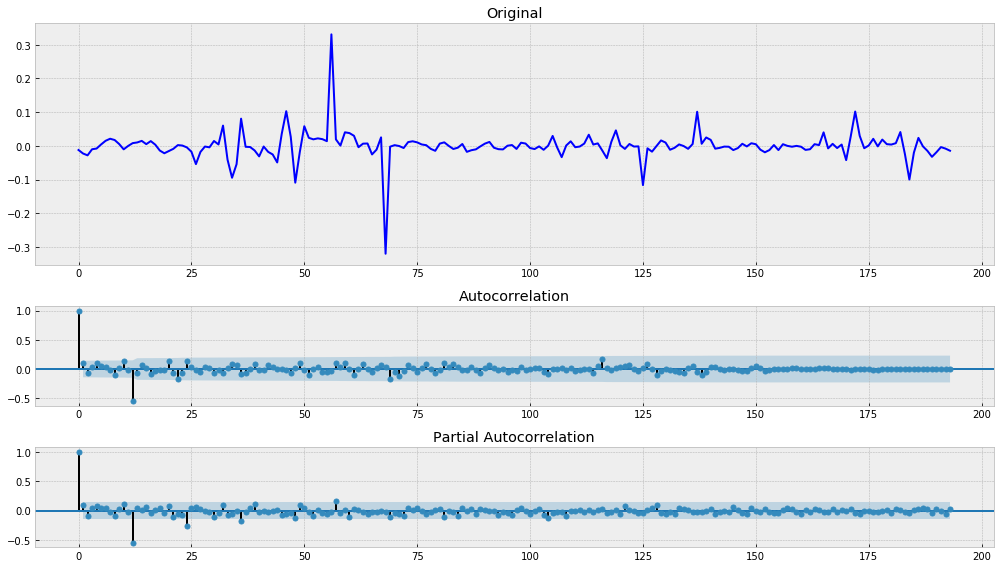

In [21]:
tsplot(series)

Теперь тест Дики-Фуллера и графики коррелограмм отвергают гипотезу о нестационарности ряда!

## Ряд второй ежемесячные продажи автомобилей за 1960 год

In [62]:
series = pd.read_csv("monthly-car-sales-in-quebec-1960.csv")

In [63]:
series.head()

,Month,Count
0,1960-01,6550
1,1960-02,8728
2,1960-03,12026
3,1960-04,14395
4,1960-05,14587


In [64]:
series=series['Count']

In [54]:
# Запустим тест Дики-Фуллера и построим графики Автокорелляции

Results of Dickey-Fuller Test:
Test Statistic                 -1.223813
p-value                         0.663269
#Lags Used                     12.000000
Number of Observations Used    95.000000
Critical Value (1%)            -3.501137
Critical Value (5%)            -2.892480
Critical Value (10%)           -2.583275
dtype: float64


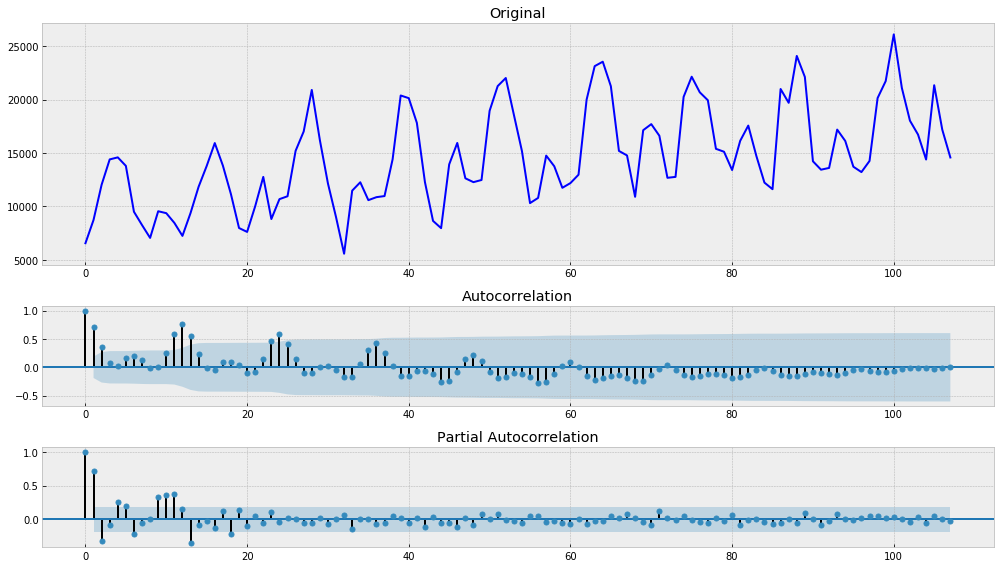

In [55]:
tsplot(series)

### P_value имеет высокое значение, значит ряд не можем назвать стационарным. 
# На графике автокорреляций видна сезонность, и обнаружено большое количество выбрасов в начале. Что не было очевидно на первоначально графике. 

РАзная дисперсия от периода к периоду. Попробуем убрать изменчивость с помощью преобразования бокса-кокса.



In [57]:
series = boxcox(series, 0)

Results of Dickey-Fuller Test:
Test Statistic                 -1.452425
p-value                         0.556901
#Lags Used                     13.000000
Number of Observations Used    94.000000
Critical Value (1%)            -3.501912
Critical Value (5%)            -2.892815
Critical Value (10%)           -2.583454
dtype: float64


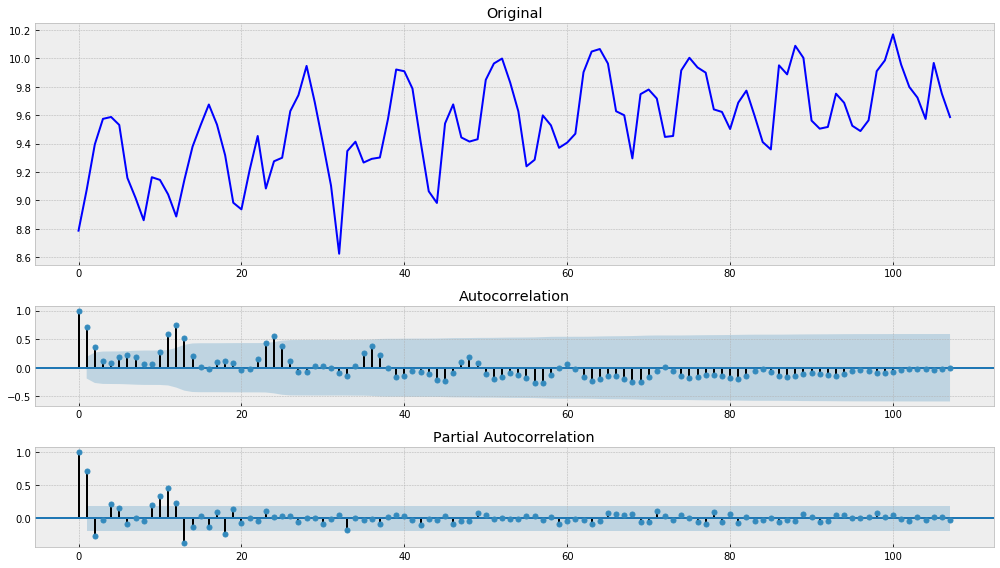

In [58]:
tsplot(series)

In [59]:
series = series[12:] - series[:-12]

Results of Dickey-Fuller Test:
Test Statistic                 -4.529131
p-value                         0.000174
#Lags Used                      1.000000
Number of Observations Used    94.000000
Critical Value (1%)            -3.501912
Critical Value (5%)            -2.892815
Critical Value (10%)           -2.583454
dtype: float64


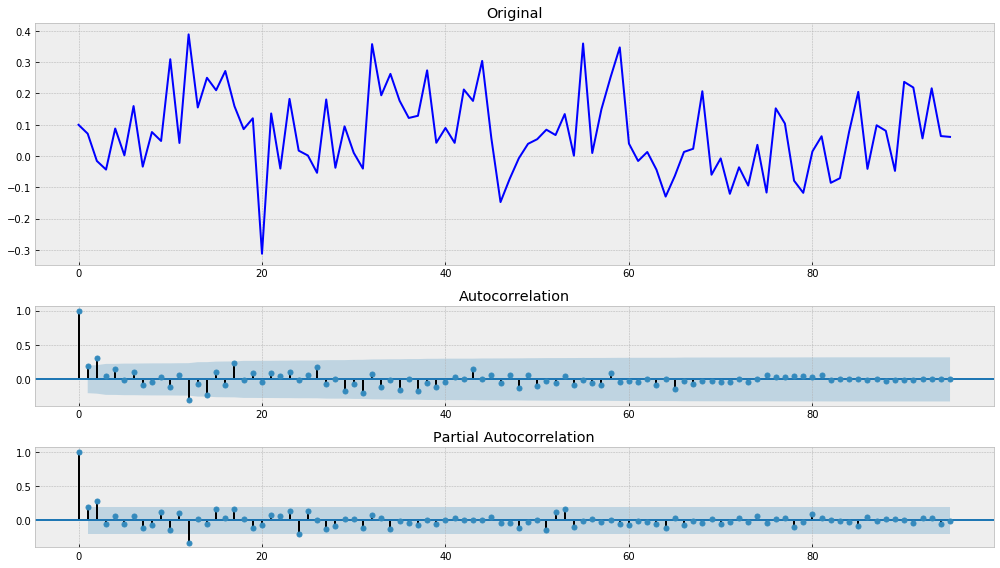

In [60]:
tsplot(series)

#### После преобразования бокса кокса и дифференицирования получили неоднозначно хороший результат. На основном графике 
продолжаем видеть большой размах дисперсии, но график автокорреляции и значение Значение P value 
отвергают гипотезу о нестационарности ряда.